import os

# Input data files are available in the "../input/" directory.
print('Directory Path where files are located')
for dirname, _, filenames in os.walk('/kaggle/input/House_Prices'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
# Validate working directory
os.getcwd() 
print(os.getcwd())
# Validate Current Path and create Path to data
from pathlib import Path
INPUT = Path("../input/house-prices-advanced-regression-techniques")
os.listdir(INPUT)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')
print('-'*25)

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


-------------------------


In [2]:
#load training and test set
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Create Independent and dependent variables
x = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice']

In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [10]:
#Create numeric dataframe
df_num = train.select_dtypes(exclude=['object']).copy()
df_num.drop(columns = 'Id', inplace = True)
df_num.describe().columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
#Create categorical dataframe
df_cat = train.select_dtypes(include=['object']).copy()
df_cat.describe().columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
print("Number of Numerical features: ", len(df_num.columns))

print("Number of Categorical features: ", len(df_cat.columns))

Number of Numerical features:  37
Number of Categorical features:  43


Skewness: 1.882876
Kurtosis: 6.536282


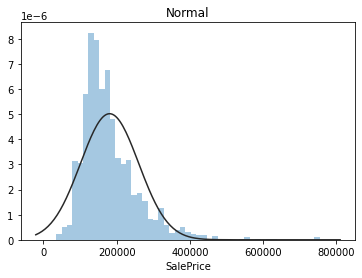

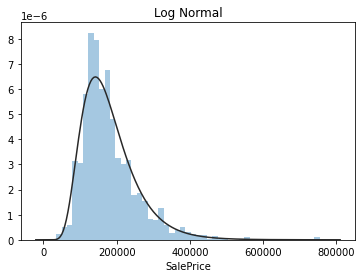

In [13]:
#Determine the distribution of the dependent variable
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

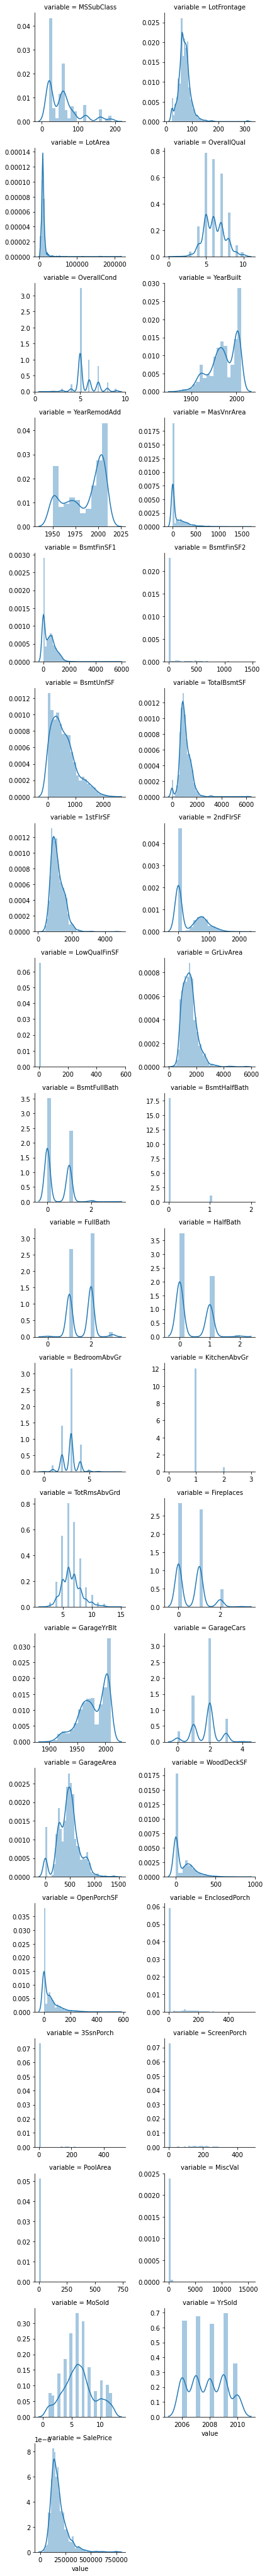

In [14]:
#Visualize numerical histograms
f = pd.melt(train, value_vars= df_num)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

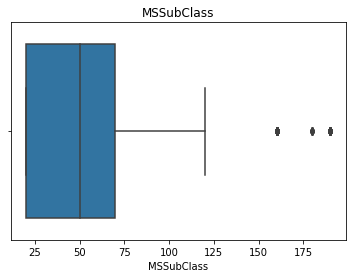

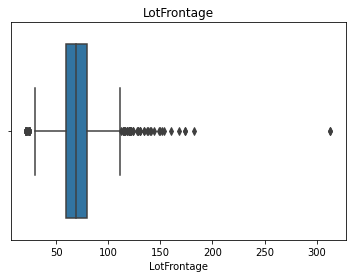

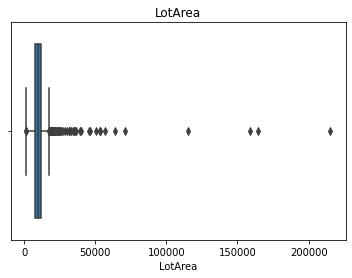

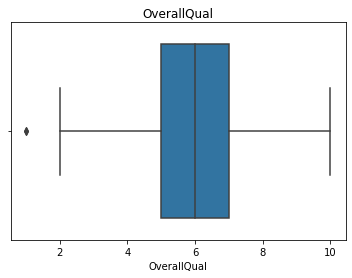

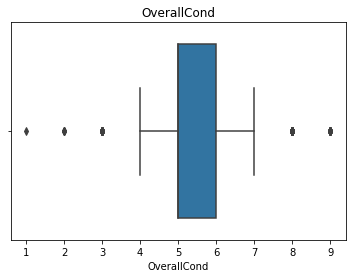

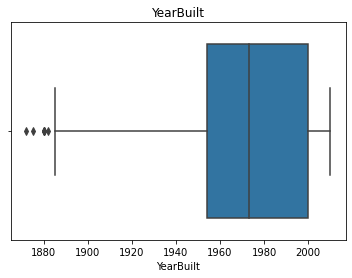

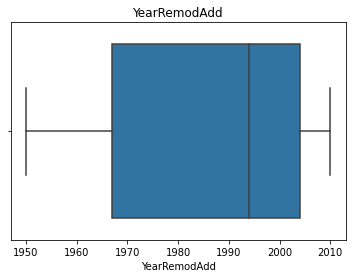

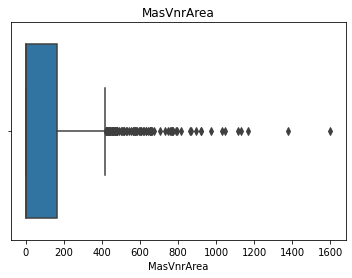

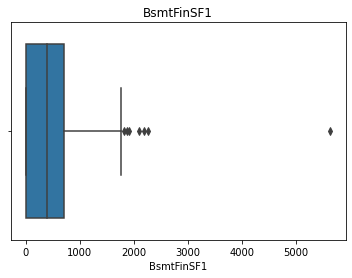

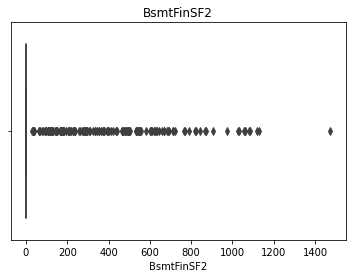

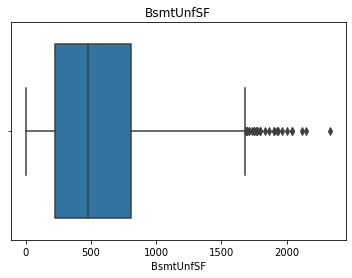

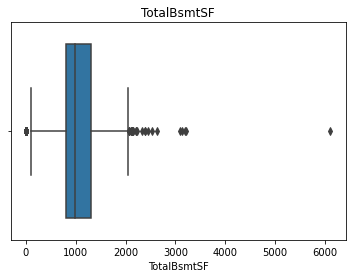

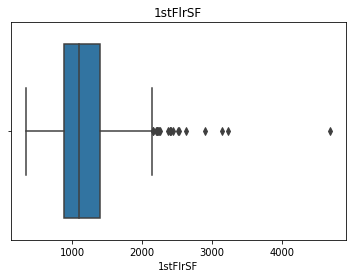

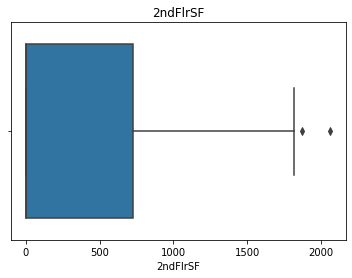

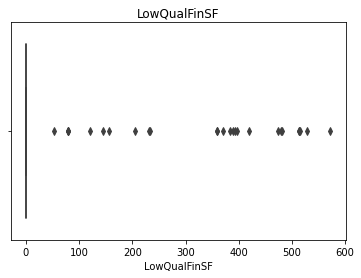

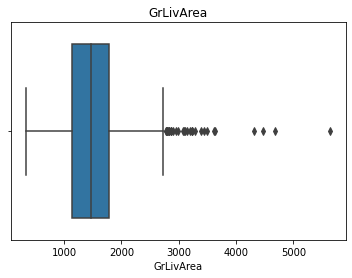

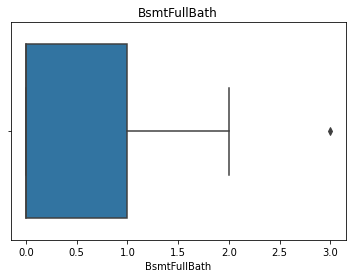

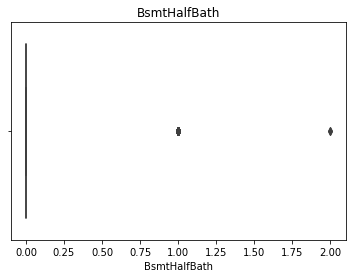

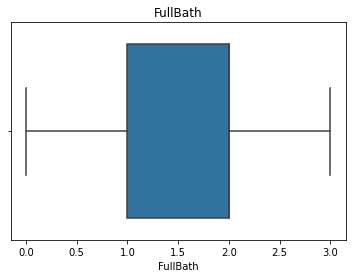

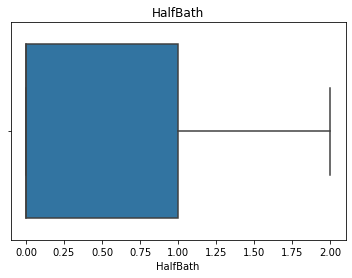

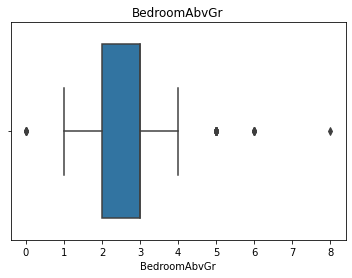

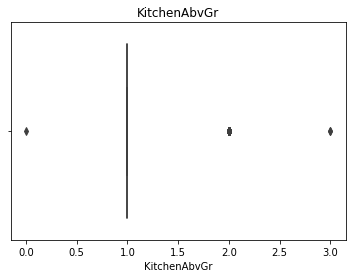

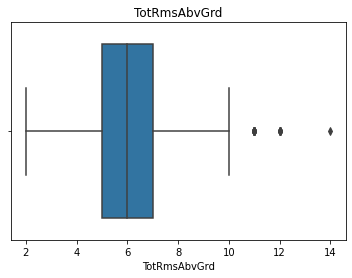

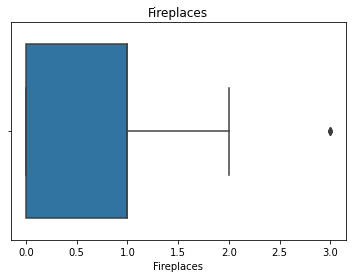

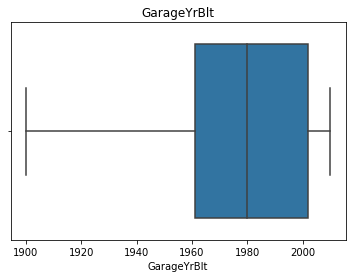

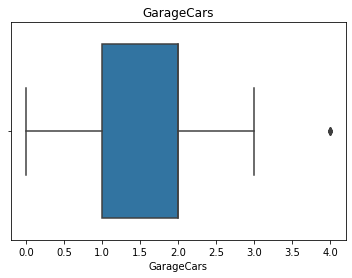

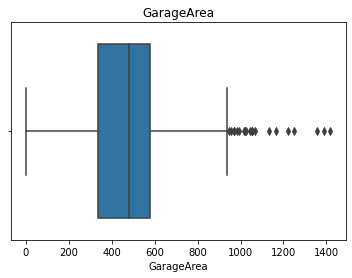

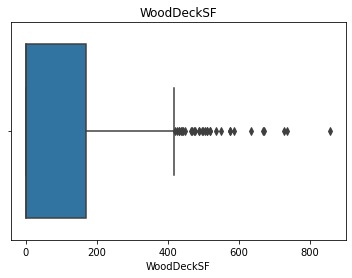

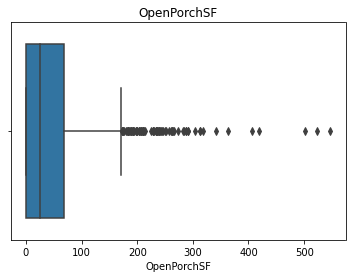

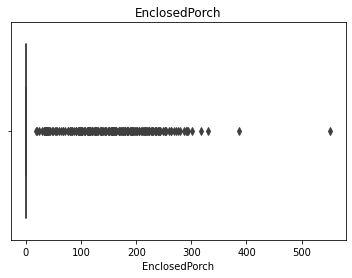

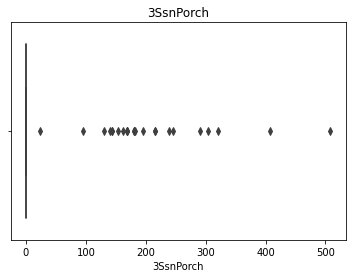

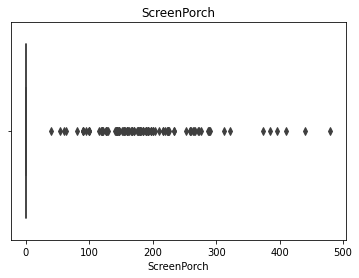

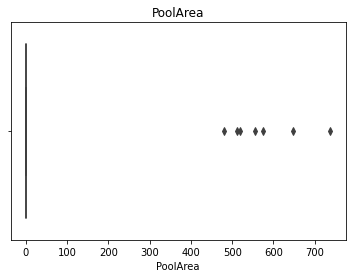

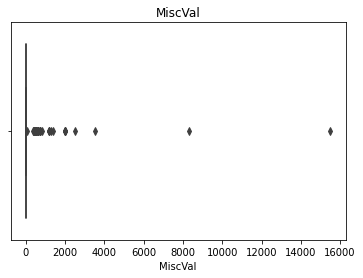

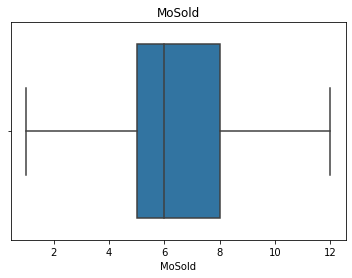

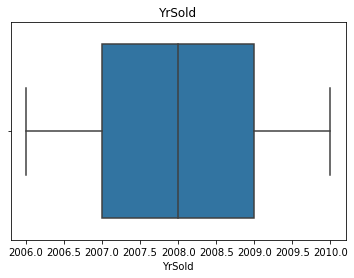

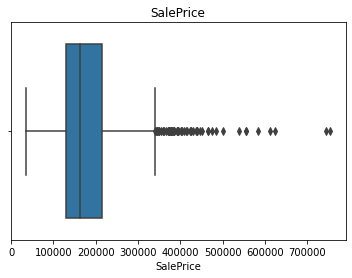

In [15]:
#Visualize Outliers in numerical variables
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.title(i)
    plt.show()

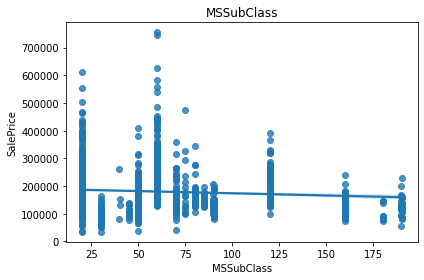

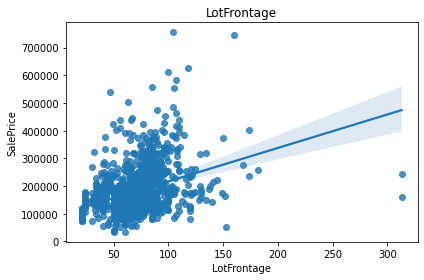

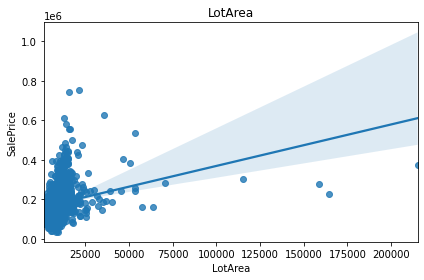

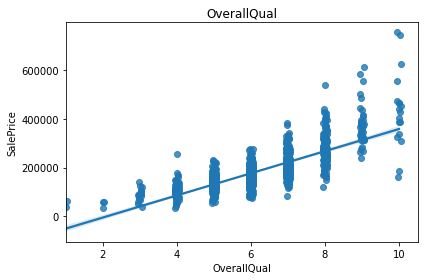

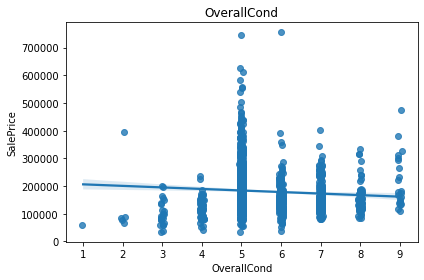

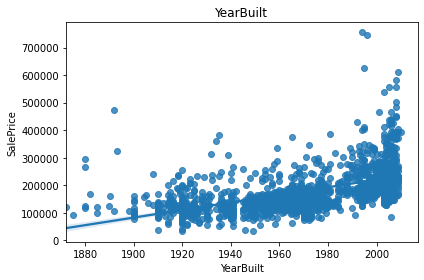

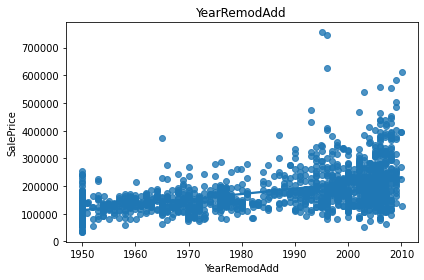

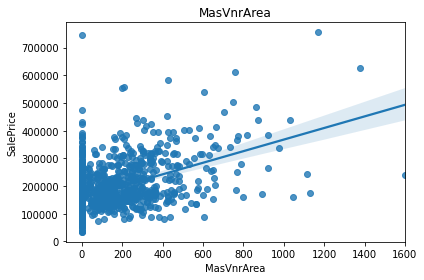

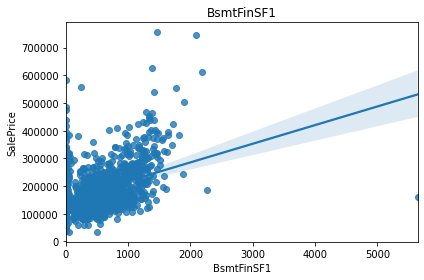

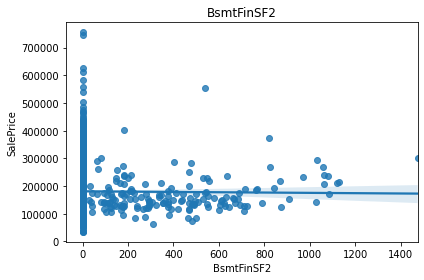

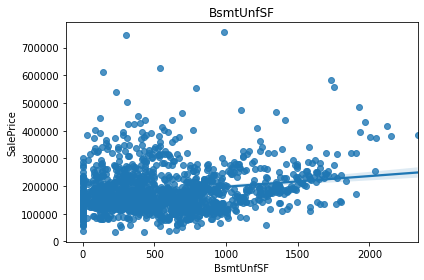

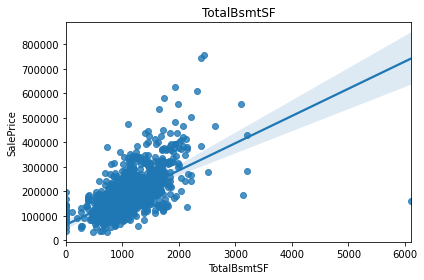

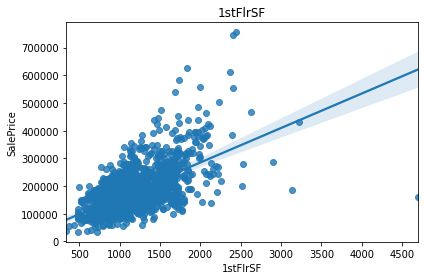

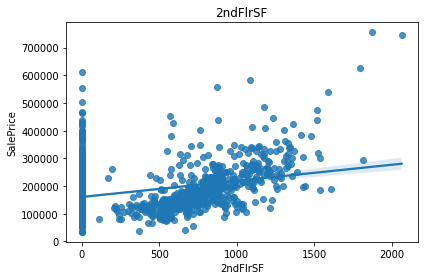

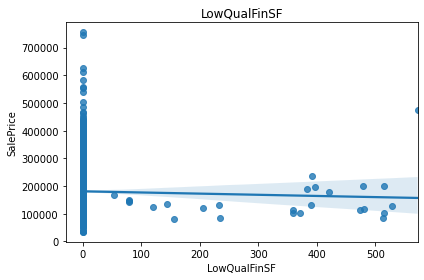

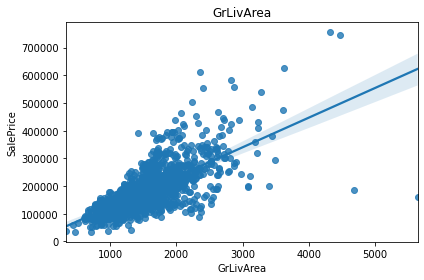

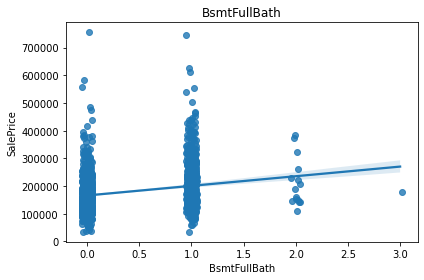

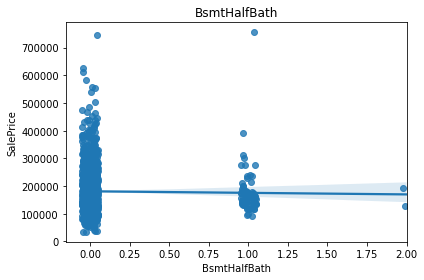

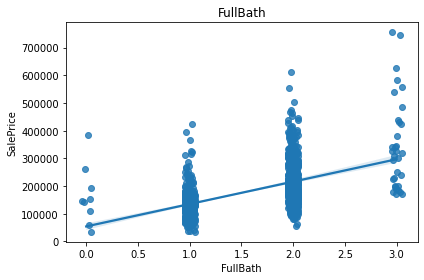

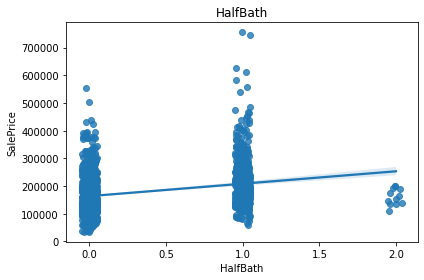

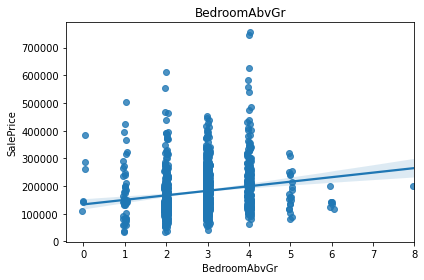

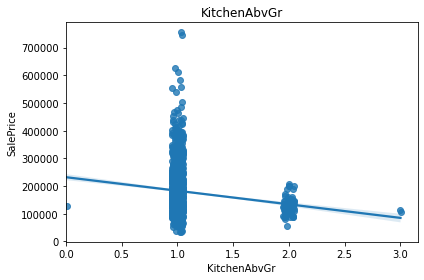

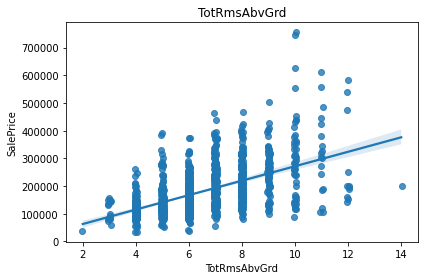

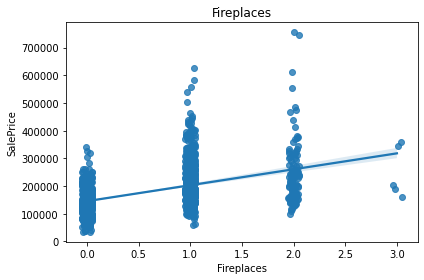

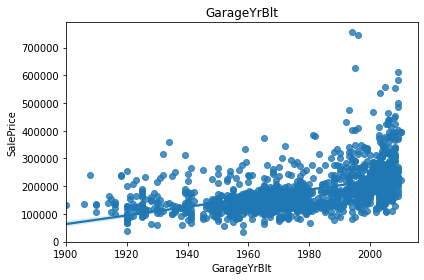

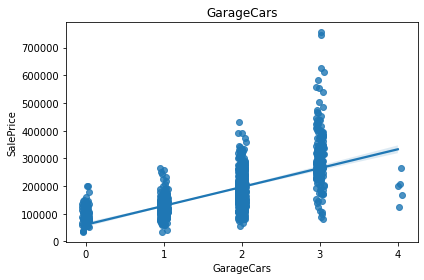

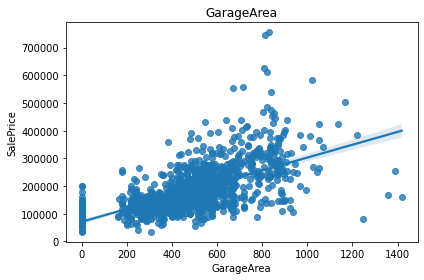

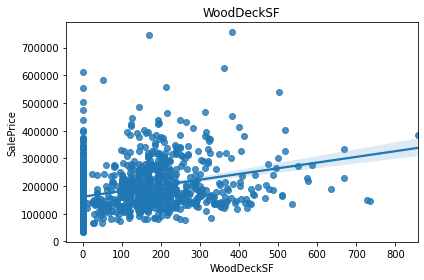

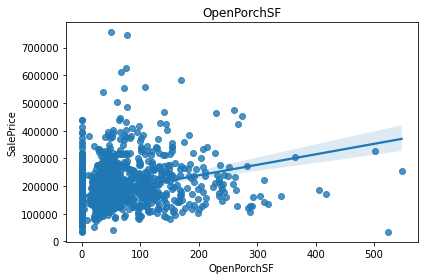

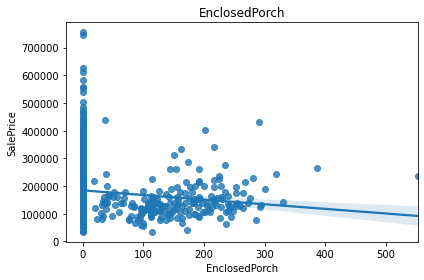

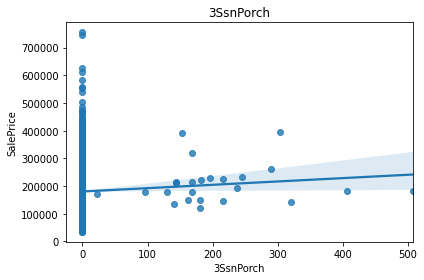

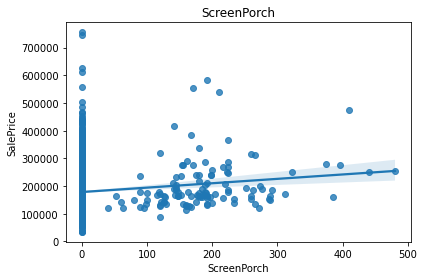

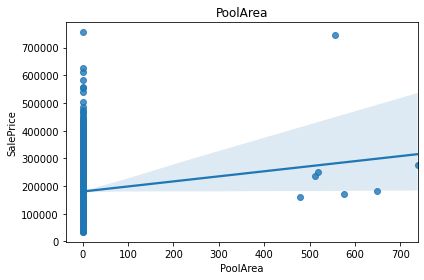

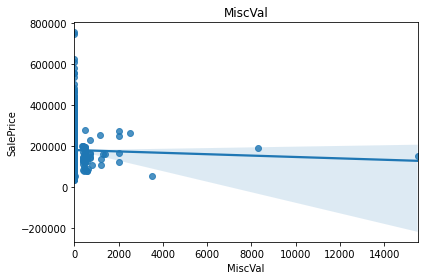

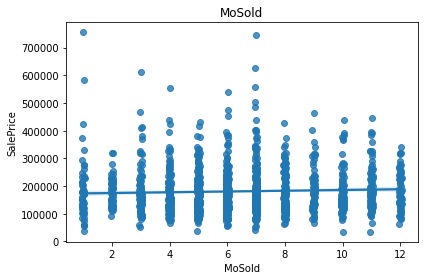

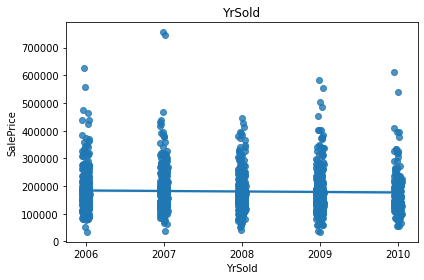

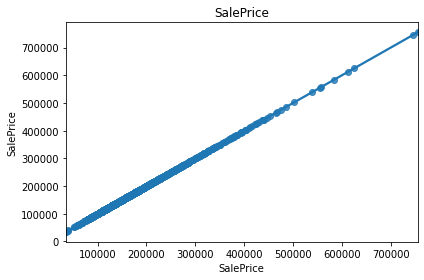

In [16]:
#Visualize the spread of numeric variables 
def scatterplot(df,feature,target_feature):
    plt.figure(constrained_layout=True)
    sns.regplot(df[feature],df[target_feature], df, x_jitter = .05)
    plt.title(feature)
    plt.tight_layout()
    plt.show()

for i in df_num.columns:
    scatterplot(train, i,"SalePrice")

In [17]:
df_num.var()

MSSubClass       1.789338e+03
LotFrontage      5.897492e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.278497e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      6.095825e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal   

In [18]:
for i in df_cat.columns :
    print(train[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype:

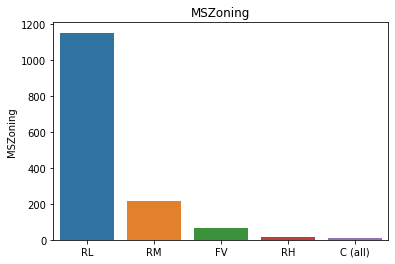

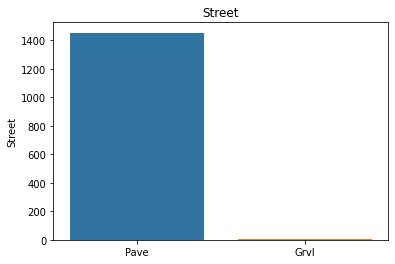

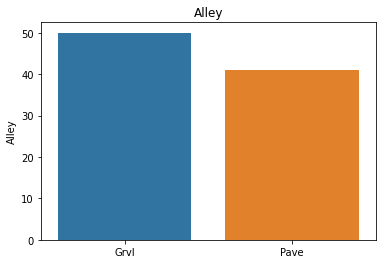

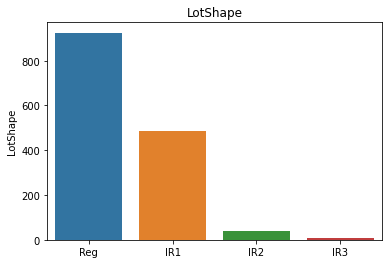

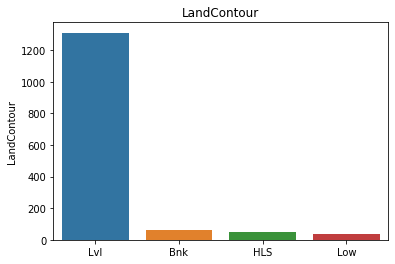

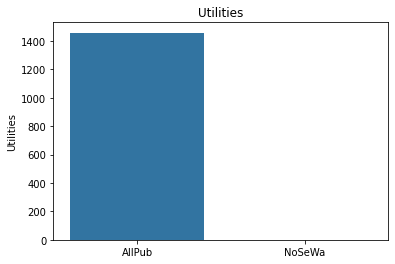

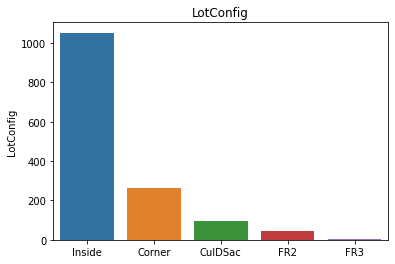

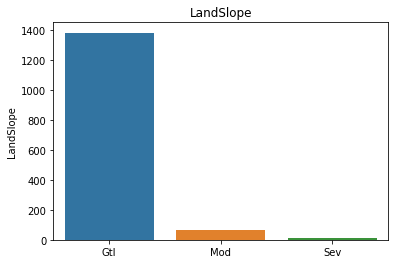

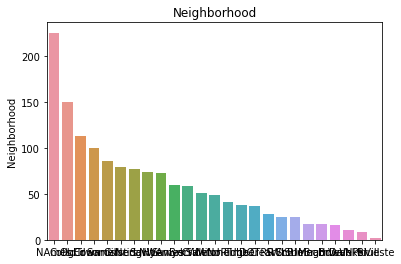

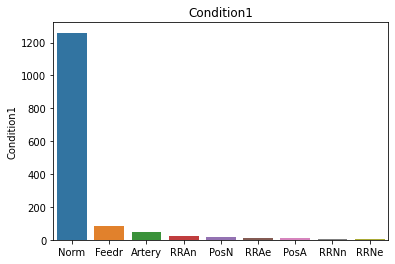

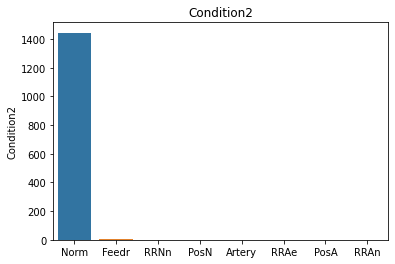

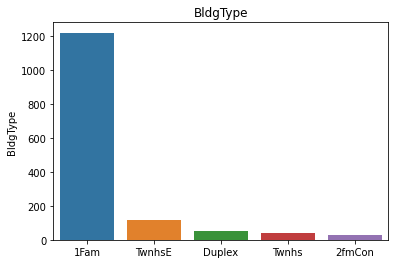

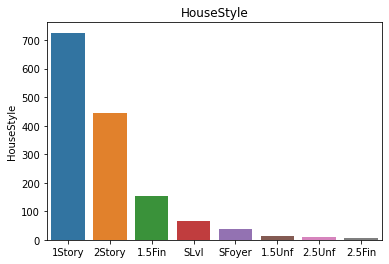

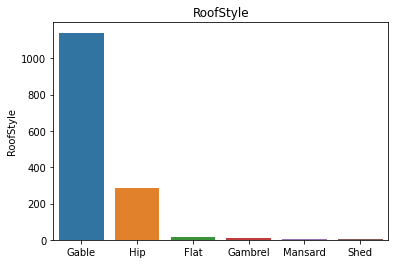

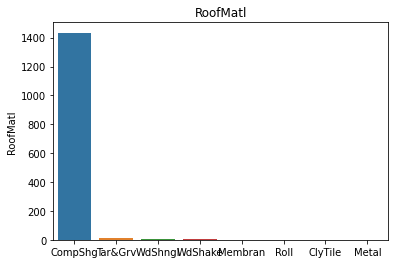

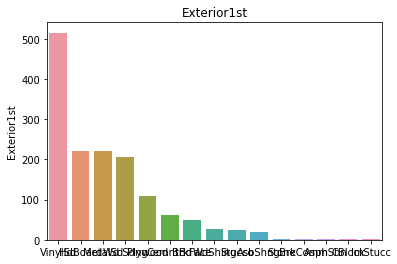

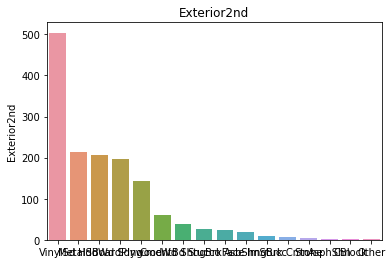

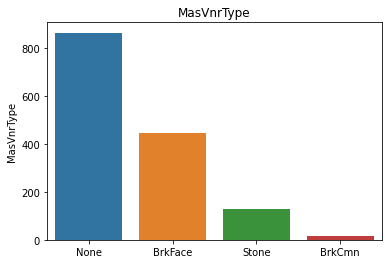

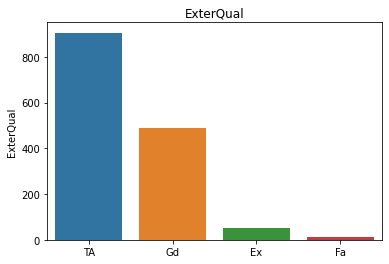

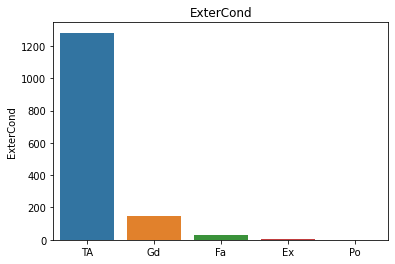

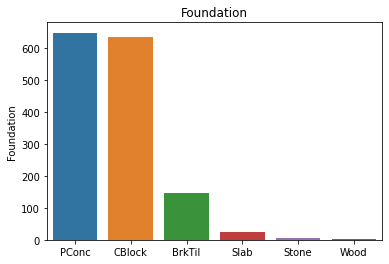

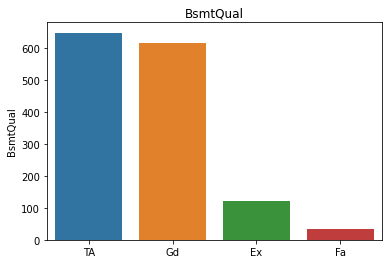

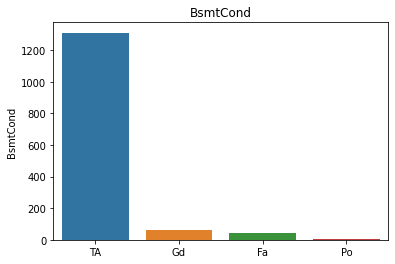

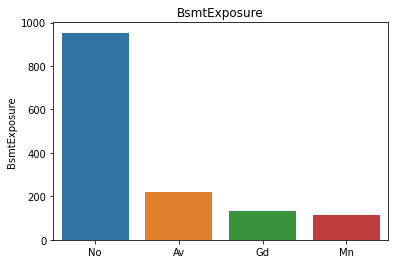

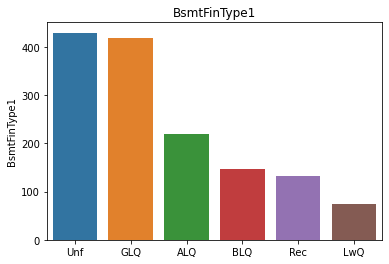

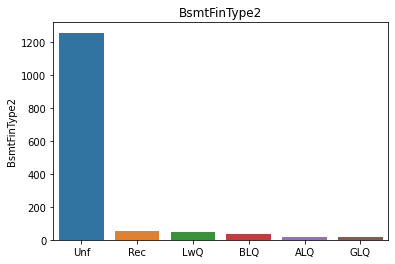

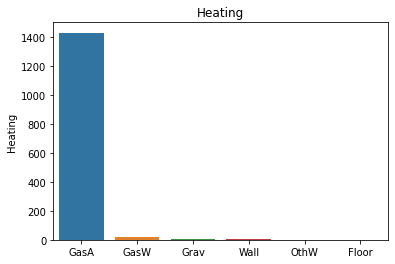

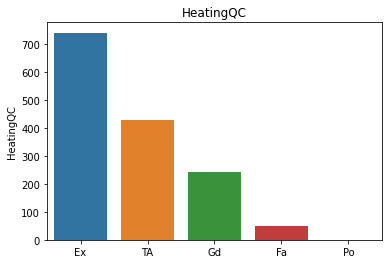

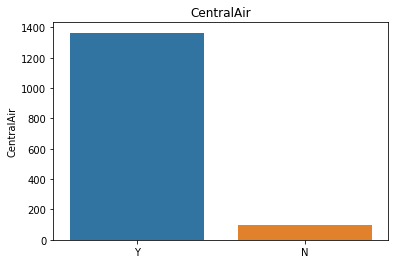

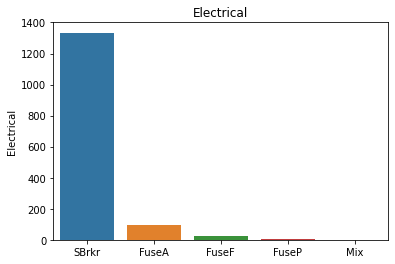

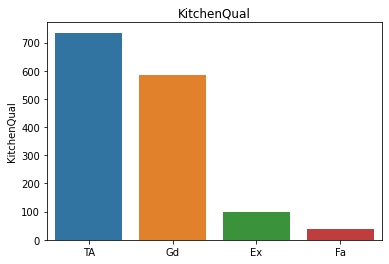

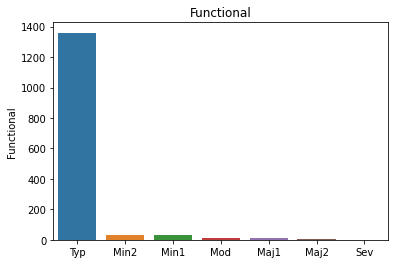

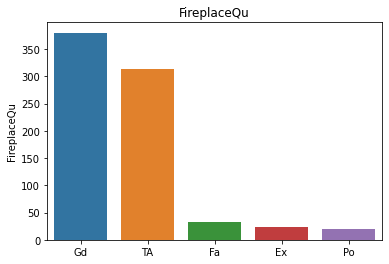

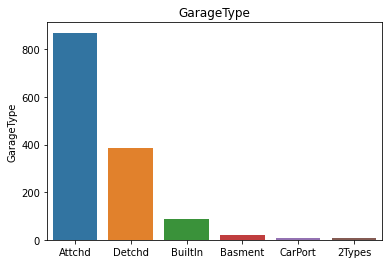

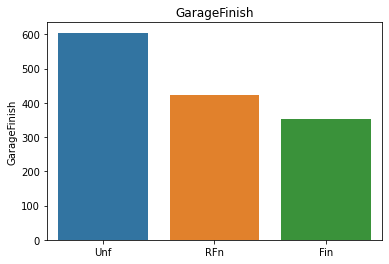

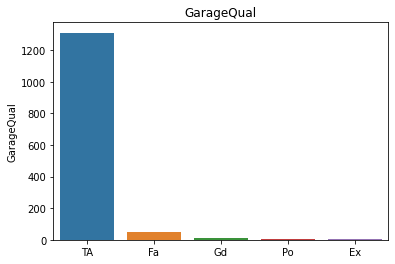

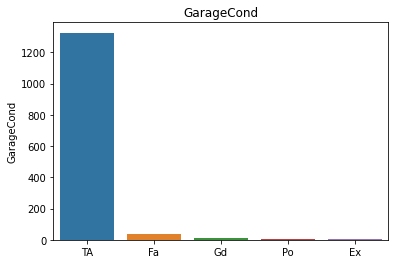

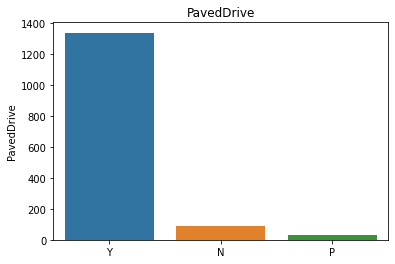

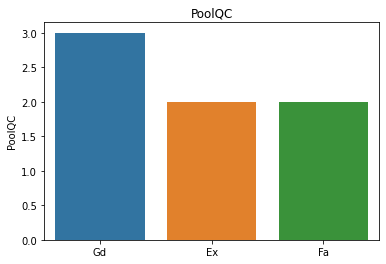

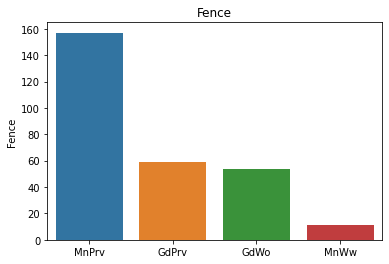

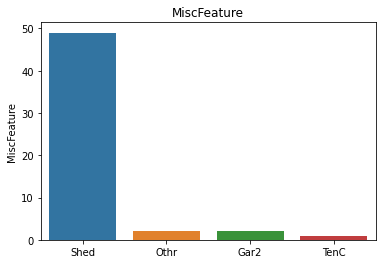

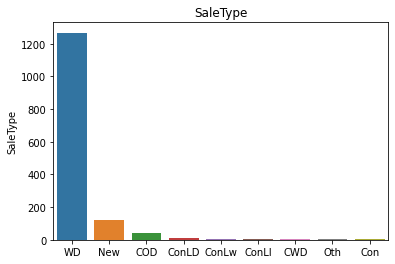

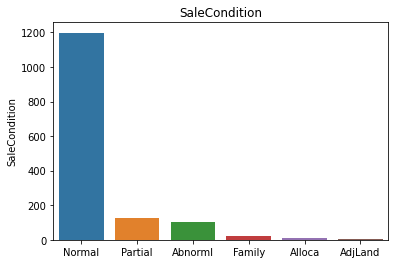

In [19]:
#Determine how many variables and observations are present in each category
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

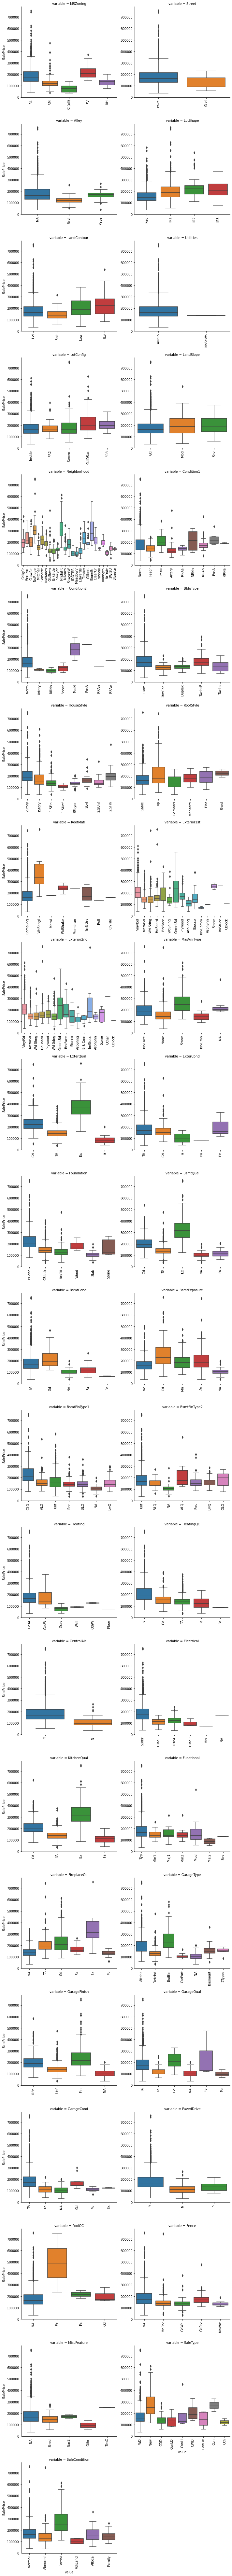

In [20]:
#Create a box plot to compare the categorical data to the sale price
for c in df_cat:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['NA'])
        train[c] = train[c].fillna('NA')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=df_cat)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [21]:
#Count null values in numerical data
null_counts = df_num.isnull().sum()
null_counts[null_counts > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [22]:
#Replace nulls with median due to high variance
df_num.fillna(df_num.median(), inplace = True)
df_num.isnull().any().all()

False

In [23]:
#Count null values in categorical data
nulls_counts = df_cat.isnull().sum()
nulls_counts[nulls_counts >0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [24]:
df_cat.replace(np.NaN,"NA", inplace = True)
df_cat.isnull().any().all()

False

In [25]:
#label and encode categorical variables
cat_le = df_cat.apply(LabelEncoder().fit_transform)
cat_le.var()

MSZoning          0.399446
Street            0.004096
Alley             0.062333
LotShape          1.985721
LandContour       0.500791
Utilities         0.000685
LotConfig         2.632942
LandSlope         0.076304
Neighborhood     36.165008
Condition1        0.754318
Condition2        0.067102
BldgType          1.435868
HouseStyle        3.653086
RoofStyle         0.697221
RoofMatl          0.358953
Exterior1st      10.225026
Exterior2nd      12.535638
MasVnrType        1.093935
ExterQual         0.481628
ExterCond         0.535542
Foundation        0.521853
BsmtQual          1.634895
BsmtCond          0.901771
BsmtExposure      2.457987
BsmtFinType1      5.069328
BsmtFinType2      1.442051
Heating           0.087098
HeatingQC         3.025944
CentralAir        0.060876
Electrical        1.765302
KitchenQual       0.689168
Functional        0.959732
FireplaceQu       1.363110
GarageType        3.737284
GarageFinish      1.420019
GarageQual        0.807817
GarageCond        0.644279
P

In [26]:
#find important features in numerical variables
num_corr = df_num.corr()
num_corr.sort_values(['SalePrice'], ascending = False, inplace = True)
num_corr.SalePrice

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [27]:
#Add Sale Price for correlation
cat_le['SalePrice'] = train['SalePrice']

#find important features in categorical variables
cat_corr = cat_le.corr()
cat_corr.sort_values(["SalePrice"], ascending = False, inplace = True)
cat_corr.SalePrice

SalePrice        1.000000
Foundation       0.382479
CentralAir       0.251328
GarageCond       0.246705
Electrical       0.237044
PavedDrive       0.231357
RoofStyle        0.222405
SaleCondition    0.213092
Neighborhood     0.210851
GarageQual       0.205963
HouseStyle       0.180163
Fence            0.140640
RoofMatl         0.132383
ExterCond        0.117303
Functional       0.115328
Exterior2nd      0.103766
Exterior1st      0.103551
BsmtCond         0.091503
Condition1       0.091155
Alley            0.083121
BsmtFinType2     0.072717
LandSlope        0.051152
Street           0.041036
LandContour      0.015453
Condition2       0.007513
Utilities       -0.014314
SaleType        -0.054911
MiscFeature     -0.066316
LotConfig       -0.067396
MasVnrType      -0.075943
BldgType        -0.085591
FireplaceQu     -0.097176
BsmtFinType1    -0.098734
Heating         -0.098812
PoolQC          -0.126070
MSZoning        -0.166872
LotShape        -0.255580
BsmtExposure    -0.294589
HeatingQC   

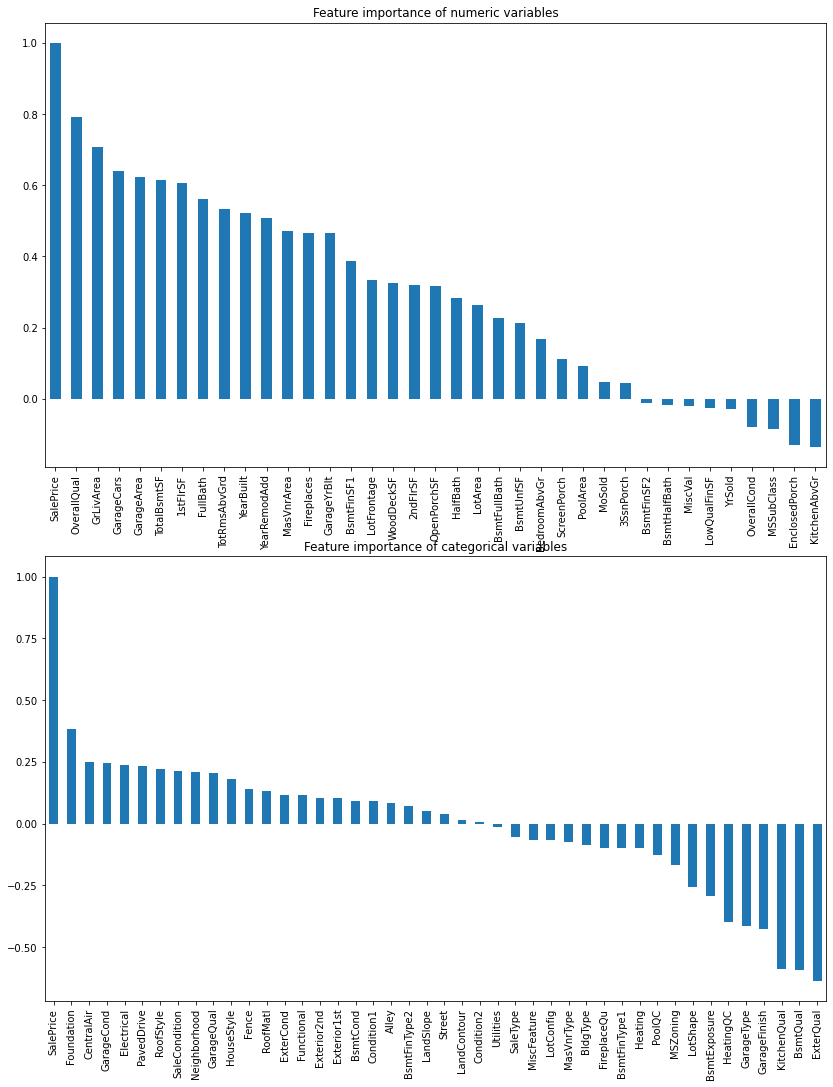

In [28]:
#Visualize variable importance
fig, axarr = plt.subplots(2, 1, figsize = (14, 18))
num_corr.SalePrice.plot.bar(ax=axarr[0])
cat_corr.SalePrice.plot.bar(ax=axarr[1])
axarr[0].set_title("Feature importance of numeric variables")
axarr[1].set_title("Feature importance of categorical variables");

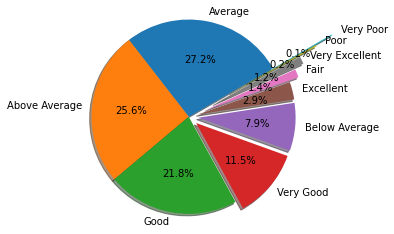

In [29]:
labels = 'Average', 'Above Average', 'Good', 'Very Good', 'Below Average','Excellent', 'Fair', 'Very Excellent', 'Poor', 'Very Poor' 
explode = (0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.2, 0.3, 0.5, 0.7)

fig1, ax1 = plt.subplots()
ax1.pie(train['OverallQual'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=30)
ax1.axis('equal')
plt.show()

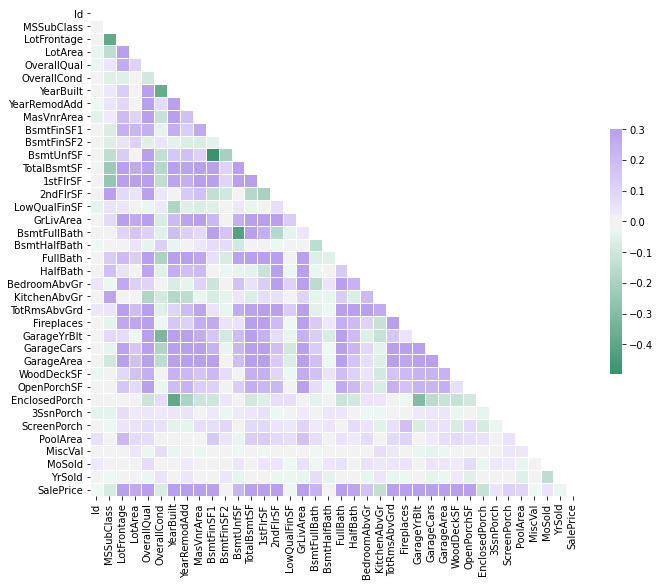

In [30]:
#Visualize Correlations
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [31]:
# Determine less important features
less_important_num = num_corr[num_corr['SalePrice'].abs() < .2].index
less_important_cat = cat_corr[cat_corr['SalePrice'].abs() < .2].index

In [32]:
df_num.drop(less_important_num, axis = 1, inplace = True)

df_cat.drop(less_important_cat, axis = 1, inplace = True)

In [33]:
# list of less important features
less_important = less_important_num.union(less_important_cat)

#drop less important features
train.drop(less_important, axis = 1, inplace = True)


In [34]:
print("Number of Numerical features: ", len(df_num.columns))

print("Number of Categorical features: ", len(df_cat.columns))

Number of Numerical features:  23
Number of Categorical features:  17


In [35]:
train.isnull().sum()

Id                 0
LotFrontage      259
LotArea            0
LotShape           0
Neighborhood       0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual           0
BsmtExposure       0
BsmtFinSF1         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
GarageType         0
GarageYrBlt       81
GarageFinish       0
GarageCars         0
GarageArea         0
GarageQual         0
GarageCond         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
SaleCondition      0
SalePrice          0
dtype: int64

In [36]:
#Clean remaining important variables
train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['GarageYrBlt'].fillna(0 , inplace = True)
#train.drop(columns = 'Id', inplace = True)
train.isnull().any().all()

False

In [37]:
train.describe().columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [38]:
for i in df_num.columns:
    print(i,' ',
          'Skewness: {:05.2f}'.format(train[i].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[i].kurt())  
         )

LotFrontage   Skewness: 02.38     Kurtosis: 021.85
LotArea   Skewness: 12.21     Kurtosis: 203.24
OverallQual   Skewness: 00.22     Kurtosis: 000.10
YearBuilt   Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd   Skewness: -0.50     Kurtosis: -01.27
MasVnrArea   Skewness: 02.67     Kurtosis: 010.08
BsmtFinSF1   Skewness: 01.69     Kurtosis: 011.12
BsmtUnfSF   Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF   Skewness: 01.52     Kurtosis: 013.25
1stFlrSF   Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF   Skewness: 00.81     Kurtosis: -00.55
GrLivArea   Skewness: 01.37     Kurtosis: 004.90
BsmtFullBath   Skewness: 00.60     Kurtosis: -00.84
FullBath   Skewness: 00.04     Kurtosis: -00.86
HalfBath   Skewness: 00.68     Kurtosis: -01.08
TotRmsAbvGrd   Skewness: 00.68     Kurtosis: 000.88
Fireplaces   Skewness: 00.65     Kurtosis: -00.22
GarageYrBlt   Skewness: -3.87     Kurtosis: 013.04
GarageCars   Skewness: -0.34     Kurtosis: 000.22
GarageArea   Skewness: 00.18     Kurtosis: 000.92
Wood

In [39]:
#Encode the categorical variables
qualitative = df_cat.columns

train[qualitative] = train[qualitative].apply(LabelEncoder().fit_transform)

In [40]:
for i in df_cat.columns:
    print(i,' ',
          'Skewness: {:05.2f}'.format(train[i].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[i].kurt())  
         )

LotShape   Skewness: -0.61     Kurtosis: -01.60
Neighborhood   Skewness: 00.04     Kurtosis: -01.08
RoofStyle   Skewness: 01.47     Kurtosis: 000.62
ExterQual   Skewness: -1.83     Kurtosis: 003.89
Foundation   Skewness: 00.09     Kurtosis: 001.03
BsmtQual   Skewness: -0.50     Kurtosis: -00.72
BsmtExposure   Skewness: -0.98     Kurtosis: -00.77
HeatingQC   Skewness: 00.48     Kurtosis: -01.51
CentralAir   Skewness: -3.53     Kurtosis: 010.48
Electrical   Skewness: -3.03     Kurtosis: 007.29
KitchenQual   Skewness: -1.42     Kurtosis: 001.73
GarageType   Skewness: 00.64     Kurtosis: -01.41
GarageFinish   Skewness: -0.62     Kurtosis: -01.17
GarageQual   Skewness: -3.25     Kurtosis: 009.77
GarageCond   Skewness: -3.58     Kurtosis: 012.51
PavedDrive   Skewness: -3.31     Kurtosis: 009.27
SaleCondition   Skewness: -2.74     Kurtosis: 006.86


In [79]:
#Scale and clean the remaining variables
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(feature):
    train[feature+'2'] = train[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('GarageArea')

In [80]:
#train["SalePrice"] = np.log1p(train["SalePrice"])
#Re-intialize Independent and dependent variables
x = train.drop(['SalePrice'], axis = 1)
y = train['SalePrice'].reset_index(drop=True)

In [81]:
#Find outliers determined by z score
z = np.abs(st.zscore(train['SalePrice']))
outliers = np.where(z > 3)
outliers

(array([  30,  440,  495,  533,  691,  803,  898,  916,  968, 1046, 1169,
        1182], dtype=int64),)

In [82]:
#Remove outliers from dependent and independent variable
#x = x.drop(x.index[outliers])
#y = y.drop(y.index[outliers])

#removing one outlier to match test set
x.drop([x.index[30]], inplace = True)
y.drop([y.index[30]], inplace = True)

In [83]:
x.shape, y.shape

((1459, 40), (1459,))

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 40)

In [85]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
#Clean NaN values created from the scaler
x_train[np.isnan(x_train)] = np.median(x_train[~np.isnan(x_train)])
x_test [np.isnan(x_test)] = np.median(x_test[~np.isnan(x_test)])

In [87]:
# import models
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [88]:
#Create a pipeline to have an intial look at model performances
models = []
models.append(('LinearRegression', Pipeline([('LinearRegression', LinearRegression())])))
models.append(('Ridge', Pipeline([('Ridge', Ridge())])))
models.append(('Lasso', Pipeline([('Lasso', Lasso())])))
models.append(('ElasticNet', Pipeline([('Elastic', ElasticNet())])))
models.append(('SGD', Pipeline([('SGD', SGDRegressor())])))

In [89]:
#initialize sklearn pipeline to score models prior to tuning
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 10
models_score ={}
for i in models:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], x_train, y_train, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('Ridge', 0.8602518578726196),
 ('LinearRegression', 0.8564511836691885),
 ('Lasso', -0.009457038009586438),
 ('ElasticNet', -0.009457038009586438),
 ('SGD', -0.5915171727080436)]

#### None of the models perform particularly well. They will require some tuning to achive better scores

In [90]:
#Build model function for models to produce scores and error
def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return r2, mae, mse, rmse

In [91]:
#Linear regression model
reg = linear_model.LinearRegression().fit(x_train, y_train)
cv_r2 = cross_val_score(reg, x_train, y_train, cv = 10)
y_preds = reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: 0.8478047018041437
R^2 score: 0.8829285480035074
Mean Absolute Error: 0.09842345879267413
Mean Squared Error: 0.019198275341737365
Root Mean Squared Error: 0.13855784114129868


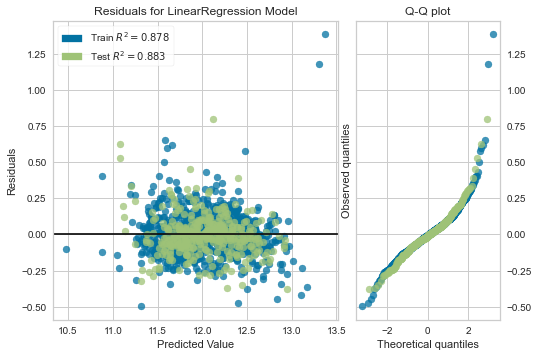

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [92]:
#Examine residuals of linear regression model
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg,hist=False, qqplot=True)
# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)  
# Evaluate the model on the test data
visualizer.score(x_test, y_test)  
visualizer.show()  

#### Linear Regression model produces a decent score without much tuning necessary. The residuals and distribution is relatively stable. However, there is are a number of outliers present. 

In [93]:
#Ridge regression model
ridge_reg = linear_model.Ridge(alpha=.1).fit(x_train, y_train)
cv_r2 = cross_val_score(ridge_reg, x_train, y_train, cv = 10)
y_preds = ridge_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: 0.8489541502358054
R^2 score: 0.8831033194200038
Mean Absolute Error: 0.09817584333548887
Mean Squared Error: 0.019169614983310577
Root Mean Squared Error: 0.13845437870761104


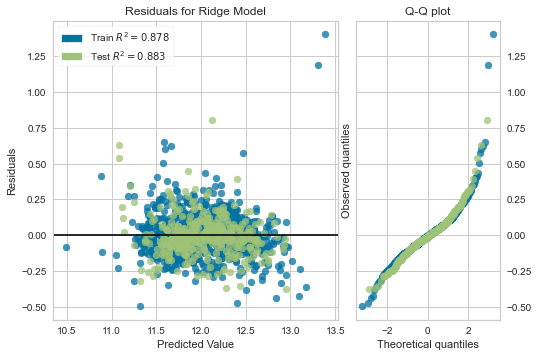

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [94]:
#Examine residuals of ridge regression model
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(ridge_reg,hist=False, qqplot=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

#### Ridge model performs slightly better than linear regrssion. No significant difference. 

In [95]:
#Build Lasso Model
#Lasso model required smaller alpha to better fit to data
lasso_reg = linear_model.Lasso(alpha=.001, random_state = 40).fit(x_train, y_train)
cv_r2 = cross_val_score(lasso_reg, x_train, y_train, cv = 10)
y_preds = lasso_reg.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: 0.8548442187137704
R^2 score: 0.8795792247179345
Mean Absolute Error: 0.09981578651330164
Mean Squared Error: 0.019747523083593732
Root Mean Squared Error: 0.14052588047613768


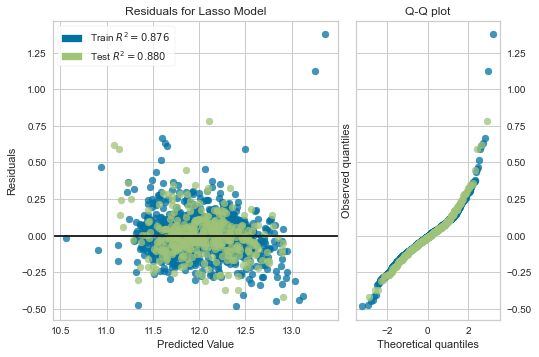

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [96]:
visualizer = ResidualsPlot(lasso_reg,hist=False, qqplot=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

#### The lasso model achieves the same meterics as the standard linear regression model

In [97]:
#Build ElasticNet Model
#ElasticNet also required a smaller alpha
elastic_net = linear_model.ElasticNet(alpha=.001, random_state = 40).fit(x_train, y_train)
cv_r2 = cross_val_score(elastic_net, x_train, y_train, cv = 10)
y_preds = elastic_net.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: 0.8548251642637714
R^2 score: 0.8814380408254744
Mean Absolute Error: 0.09890121357961391
Mean Squared Error: 0.019442700149961058
Root Mean Squared Error: 0.13943708312339675


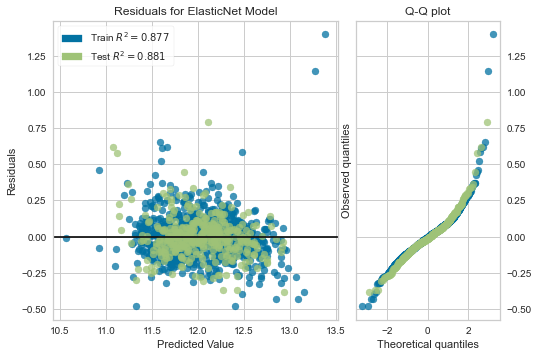

<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [98]:
visualizer = ResidualsPlot(elastic_net,hist=False, qqplot=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [104]:
#Build SGD Model
SGD = linear_model.SGDRegressor(alpha=.001, random_state = 40).fit(x_train, y_train)
cv_r2 = cross_val_score(SGD, x_train, y_train, cv = 10)
y_preds = SGD.predict(x_test)
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae, mse, rmse = model_evaluate(y_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))
print("Mean Squared Error: " + str(mse))
print("Root Mean Squared Error: " + str(rmse))

Cross val score: -0.6187215964179743
R^2 score: -0.5218997878808582
Mean Absolute Error: 0.3630145824222134
Mean Squared Error: 0.24957280935700482
Root Mean Squared Error: 0.49957262670907504


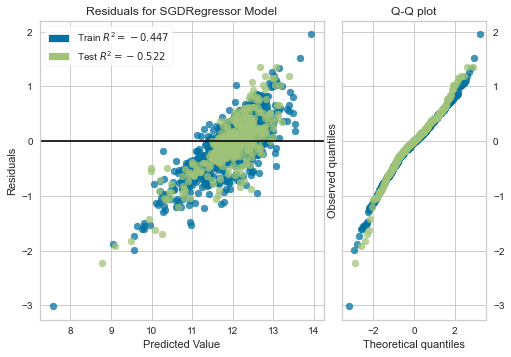

<AxesSubplot:title={'center':'Residuals for SGDRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [100]:
visualizer = ResidualsPlot(SGD, hist=False, qqplot=True)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [69]:
#Prepare dataframe for submission
model = linear_model.SGDRegressor(alpha=.001).fit(x_test, y_test)
x_all = np.concatenate((x_train, x_test))
y_preds = model.predict(x_all)
#return the predicted values to state prior to transformations
predicted = np.exp(y_preds) 
result_df = pd.DataFrame(columns=['Id', 'SalePrice'])
result_df.Id = test.Id
result_df.SalePrice = y_preds

In [65]:
#Ensuring dataframe length matched kaggle requirements
result_df.shape

(1459, 2)

In [66]:
result_df.to_csv('output.csv', index=False)